This code is basically the same as model_training.py except written in a jupyter notebook so it can work with google colab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [3]:
#seed allows for exact repeateability
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
#Change file names in the following two
cook_df = pd.read_csv('./samples/cook.csv')
flick_df = pd.read_csv('./samples/flickup.csv')
jog_df = pd.read_csv('./samples/jog.csv')

#getting rid of last 5 elements from flick_df and extra elements from jog.csv
flick_df = flick_df[0:len(flick_df)-10]
jog_df = jog_df[0:len(jog_df)-120]

#since one second is about 118 rows, im getting rid of the extra rows that would make it evenly divisible
cook_df = cook_df[0:len(cook_df)-len(cook_df)%118]
flick_df = flick_df[0:len(flick_df)-len(flick_df)%118]
jog_df = jog_df[0:len(jog_df)-len(jog_df)%118]


print(cook_df.info())
print(flick_df.info())
print(jog_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 316.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 316.3 KB
None
<class '

In [5]:
#scaling this puts all the values between 0 and 1
cook_df[['Ax','Ay','Az']] = (cook_df[['Ax','Ay','Az']] + 4)/8
flick_df[['Ax','Ay','Az']] = (flick_df[['Ax','Ay','Az']] + 4)/8
jog_df[['Ax','Ay','Az']] = (jog_df[['Ax','Ay','Az']] + 4)/8


cook_df[['Gx','Gy','Gz']] = (cook_df[['Gx','Gy','Gz']] + 2000)/4000
flick_df[['Gx','Gy','Gz']] = (flick_df[['Gx','Gy','Gz']] + 2000)/4000
jog_df[['Gx','Gy','Gz']] = (jog_df[['Gx','Gy','Gz']] + 2000)/4000

cook_df['Class'] = 'cook'
flick_df['Class'] = 'flick'
jog_df['Class'] = 'jog'

print(jog_df.head())
print(flick_df.info())

   Time        Ax        Ay        Az        Gx        Gy        Gz Class
0     2  0.530854  0.587951  0.601914  0.485809  0.489273  0.506958   jog
1    11  0.551118  0.602448  0.619857  0.485672  0.492020  0.508347   jog
2    20  0.564361  0.605911  0.633393  0.484222  0.493546  0.509857   jog
3    29  0.577454  0.614441  0.649200  0.482834  0.496689  0.511261   jog
4    38  0.599304  0.619247  0.661499  0.482941  0.499023  0.512115   jog
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
 7   Class   5782 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 361.5+ KB
None


In [6]:
# #one hot encoding manually
# cook_df['Class'] = 0
# flick_df['Class'] = 1

# print(flick_df.head())
# print(flick_df.info())

   Time        Ax        Ay        Az        Gx        Gy        Gz  Class
0     2  0.486405  0.478210  0.671585  0.497223  0.510376  0.499649      1
1    10  0.493500  0.474228  0.670349  0.496780  0.515778  0.498718      1
2    18  0.492096  0.476258  0.679122  0.496170  0.519775  0.497681      1
3    26  0.488556  0.478942  0.683990  0.496490  0.525742  0.496445      1
4    34  0.481857  0.476761  0.675095  0.497879  0.531738  0.495636      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5782 non-null   int64  
 1   Ax      5782 non-null   float64
 2   Ay      5782 non-null   float64
 3   Az      5782 non-null   float64
 4   Gx      5782 non-null   float64
 5   Gy      5782 non-null   float64
 6   Gz      5782 non-null   float64
 7   Class   5782 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 361.5 KB
None


In [6]:
def formatData(X,Y, window):
    Xarr = []
    Yarr = []

    for i in range(0, window*(len(X)//window), int(window)):
        Xarr.append(X.iloc[i:i+window].values)  
        Yarr.append(Y.iloc[0])

    return np.array(Xarr), np.array(Yarr)

In [7]:
print(cook_df[['Class']])

     Class
0     cook
1     cook
2     cook
3     cook
4     cook
...    ...
5777  cook
5778  cook
5779  cook
5780  cook
5781  cook

[5782 rows x 1 columns]


In [7]:
window = 119
cook_x, cook_y = formatData(cook_df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']], cook_df[['Class']], window)
flick_x, flick_y = formatData(flick_df[['Ax', 'Ay', 'Az','Gx', 'Gy', 'Gz']], flick_df[['Class']], window)
jog_x, jog_y = formatData(jog_df[['Ax', 'Ay', 'Az','Gx', 'Gy', 'Gz']], jog_df[['Class']], window)



print(jog_x[:4])
print(cook_y[:4])

[[[0.53085375 0.58795125 0.60191375 0.48580933 0.48927307 0.50695801]
  [0.5511175  0.6024475  0.6198575  0.485672   0.49201965 0.50834656]
  [0.56436125 0.60591125 0.6333925  0.48422241 0.49354553 0.50985718]
  ...
  [0.5458525  0.4804225  0.50274625 0.50389099 0.49310303 0.49028015]
  [0.55345125 0.48338375 0.5069275  0.50389099 0.49310303 0.48875427]
  [0.562515   0.48780875 0.5140075  0.50372315 0.49459839 0.48728943]]

 [[0.5709225  0.4956975  0.52465875 0.50462341 0.495224   0.48660278]
  [0.58493    0.50465375 0.5526275  0.50666809 0.49549866 0.48628235]
  [0.62641875 0.51425125 0.5670775  0.50920105 0.49569702 0.48542786]
  ...
  [0.5045775  0.53042625 0.5346525  0.49778747 0.49975586 0.50027466]
  [0.48692375 0.51971375 0.5328675  0.49571228 0.50085449 0.50579834]
  [0.47380125 0.51260375 0.528595   0.49403381 0.50218201 0.50535584]]

 [[0.46392875 0.5125425  0.5263675  0.49298096 0.50408935 0.50923157]
  [0.45967125 0.5169225  0.5260925  0.49243164 0.50599671 0.51296997]
  [0

In [8]:
#concatenating the flick and cook datasets before randomizing
inputs = np.concatenate((cook_x, flick_x, jog_x))
outputs = np.concatenate((cook_y, flick_y, jog_y))

print(cook_x.shape)
print(inputs.shape)
print(outputs.shape)

(48, 119, 6)
(144, 119, 6)
(144, 1)


In [9]:
#One hot encoding with sklearn
#using labelbinarizer only works well with more than two classes. Look into sklearn.onehotencoder for binary classification, or if you are encoding featurese
lb = LabelBinarizer()
lb.fit(outputs)

outputs = lb.transform(outputs)
print(outputs.shape)
print(outputs[:5])


(144, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [10]:
##This code goes with the manual one hot encoding
# updated_output = np.zeros((96,2))
# for i in range(outputs.shape[0]):
#   if outputs[i][0] == 0:
#     updated_output[i] = np.append(outputs[i], 1)
#   else:
#     updated_output[i] = np.append(outputs[i], 0)

# outputs = updated_output
# print(outputs.shape)
# print(outputs[:5])

(96, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [10]:
#shape needs to be formatted such that the inputs to each example is in a 1D representation

inputs = inputs.reshape(-1, 119*6)
print(inputs.shape)

(144, 714)


In [11]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [12]:
print(inputs_train.shape, inputs_test.shape, inputs_validate.shape)
print(outputs_train.shape)

(86, 714) (28, 714) (30, 714)
(86, 3)


In [13]:
model = keras.Sequential()
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(15, activation= 'relu'))
model.add(layers.Dense(3, activation= 'softmax')) #last layer has to have the same number of nodes as there are classes
model.compile(optimizer= 'rmsprop', loss= 'mse', metrics=['mae', 'accuracy'])
          

In [14]:
history = model.fit(inputs_train, outputs_train, epochs = 100, batch_size = 1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/100
86/86 [==============================] - 1s 5ms/step - loss: 0.2341 - mae: 0.4228 - accuracy: 0.3953 - val_loss: 0.2475 - val_mae: 0.4564 - val_accuracy: 0.2000
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 0.2169 - mae: 0.4295 - accuracy: 0.4419 - val_loss: 0.2302 - val_mae: 0.4343 - val_accuracy: 0.3000
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 0.2072 - mae: 0.4205 - accuracy: 0.4767 - val_loss: 0.2119 - val_mae: 0.4224 - val_accuracy: 0.3000
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1959 - mae: 0.4089 - accuracy: 0.4884 - val_loss: 0.2362 - val_mae: 0.4335 - val_accuracy: 0.2000
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 0.1747 - mae: 0.3811 - accuracy: 0.5930 - val_loss: 0.1758 - val_mae: 0.3844 - val_accuracy: 0.5000
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.1488 - mae: 0.3403 - accuracy: 0.6628 - val_loss: 0.1814 - v

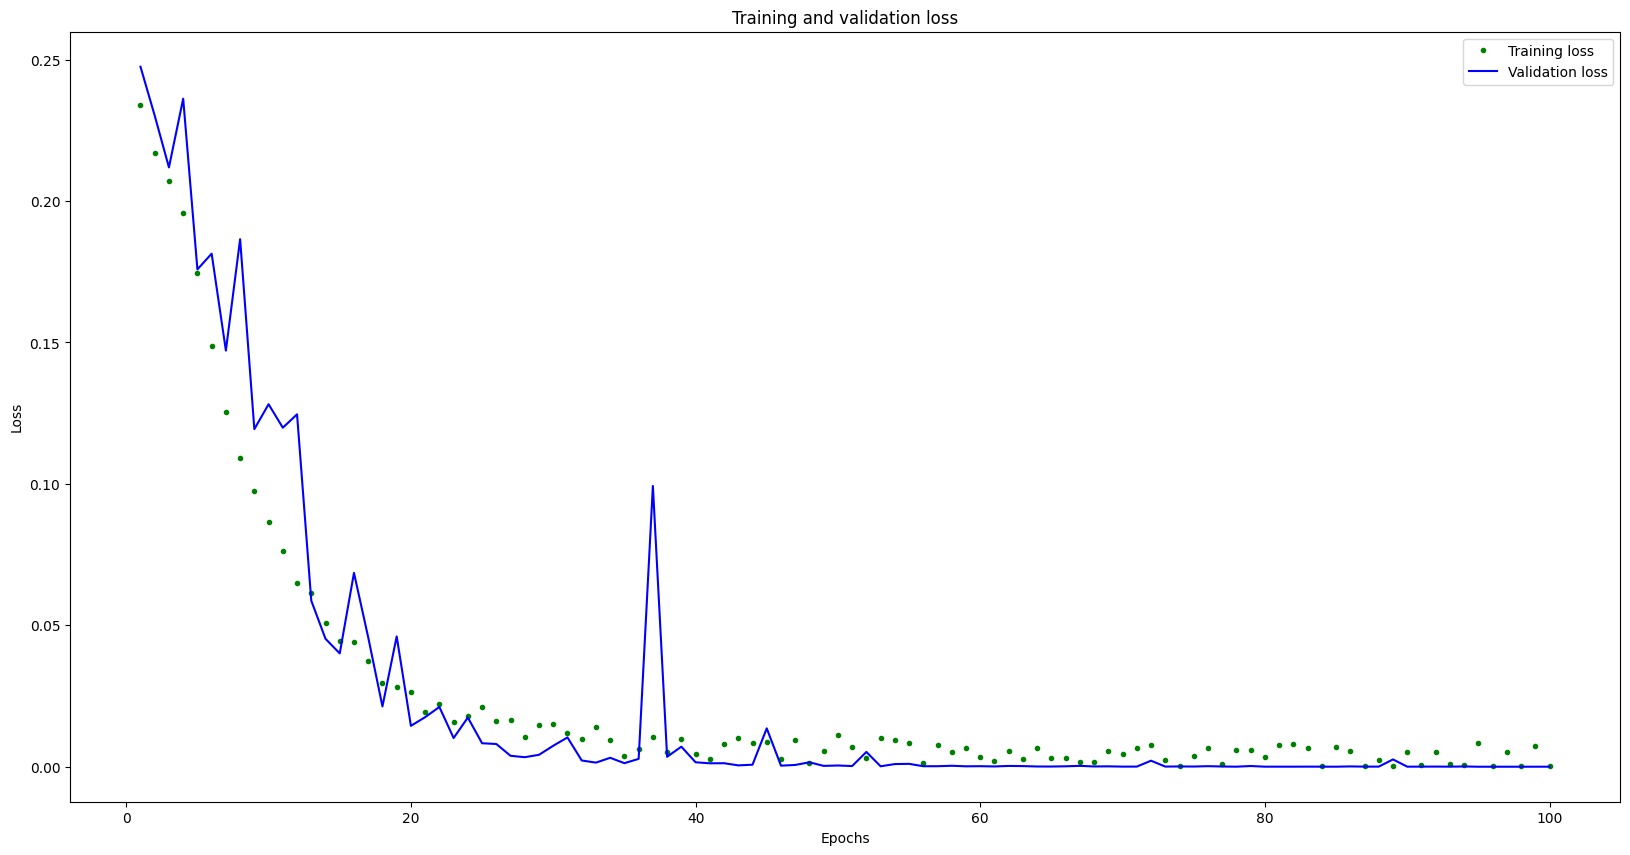

[20.0, 10.0]


In [15]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

In [17]:
#saving model 
model.save('model.h5')

In [18]:
np.save('inputs_test.npy', inputs_test)
np.save('outputs_test.npy', outputs_test)

In [16]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

1/1 [==============================] - 0s 207ms/step
predictions =
 [[1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.002 0.995 0.003]
 [0.999 0.001 0.   ]
 [0.005 0.994 0.001]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.002 0.998]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.001 0.999]
 [0.002 0.995 0.003]
 [0.    0.016 0.984]
 [0.001 0.992 0.007]
 [0.002 0.995 0.003]
 [0.    0.001 0.999]
 [0.    0.004 0.996]
 [0.001 0.982 0.017]
 [0.004 0.995 0.001]
 [0.    0.001 0.999]
 [0.998 0.002 0.   ]
 [1.    0.    0.   ]
 [0.003 0.996 0.001]]
actual =
 [[1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [18]:
def getMetrics(pred, gt, threshold = 0.7):
    
    # get locations of indexes with postive indentificaitons
    pred_labels = np.argmax(pred, axis=1)
    gt_labels = np.argmax(gt, axis= 1)
    
    #get number of values that dont meet required identification threshold
    below_threshold = sum(np.max(pred, axis=1) < threshold)

    num_correct = sum(pred_labels == gt_labels) - below_threshold
    num_predictions = len(pred)

    accuracy = num_correct/num_predictions
    print("Accuracy: {:.6%}".format(accuracy))

    return accuracy

In [19]:
def plot_cm(gt, pred, class_names, threshold = None):
  cm = confusion_matrix(gt, pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() # discover the values for bottom and top
  b += 0.5 # Add 0.5 to the bottom
  t -= 0.5 # Subtract 0.5 from the top
  plt.ylim(b, t) # update the ylim(bottom, top) values
  plt.show() # ta-da!

Accuracy: 64.285714%


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (1).

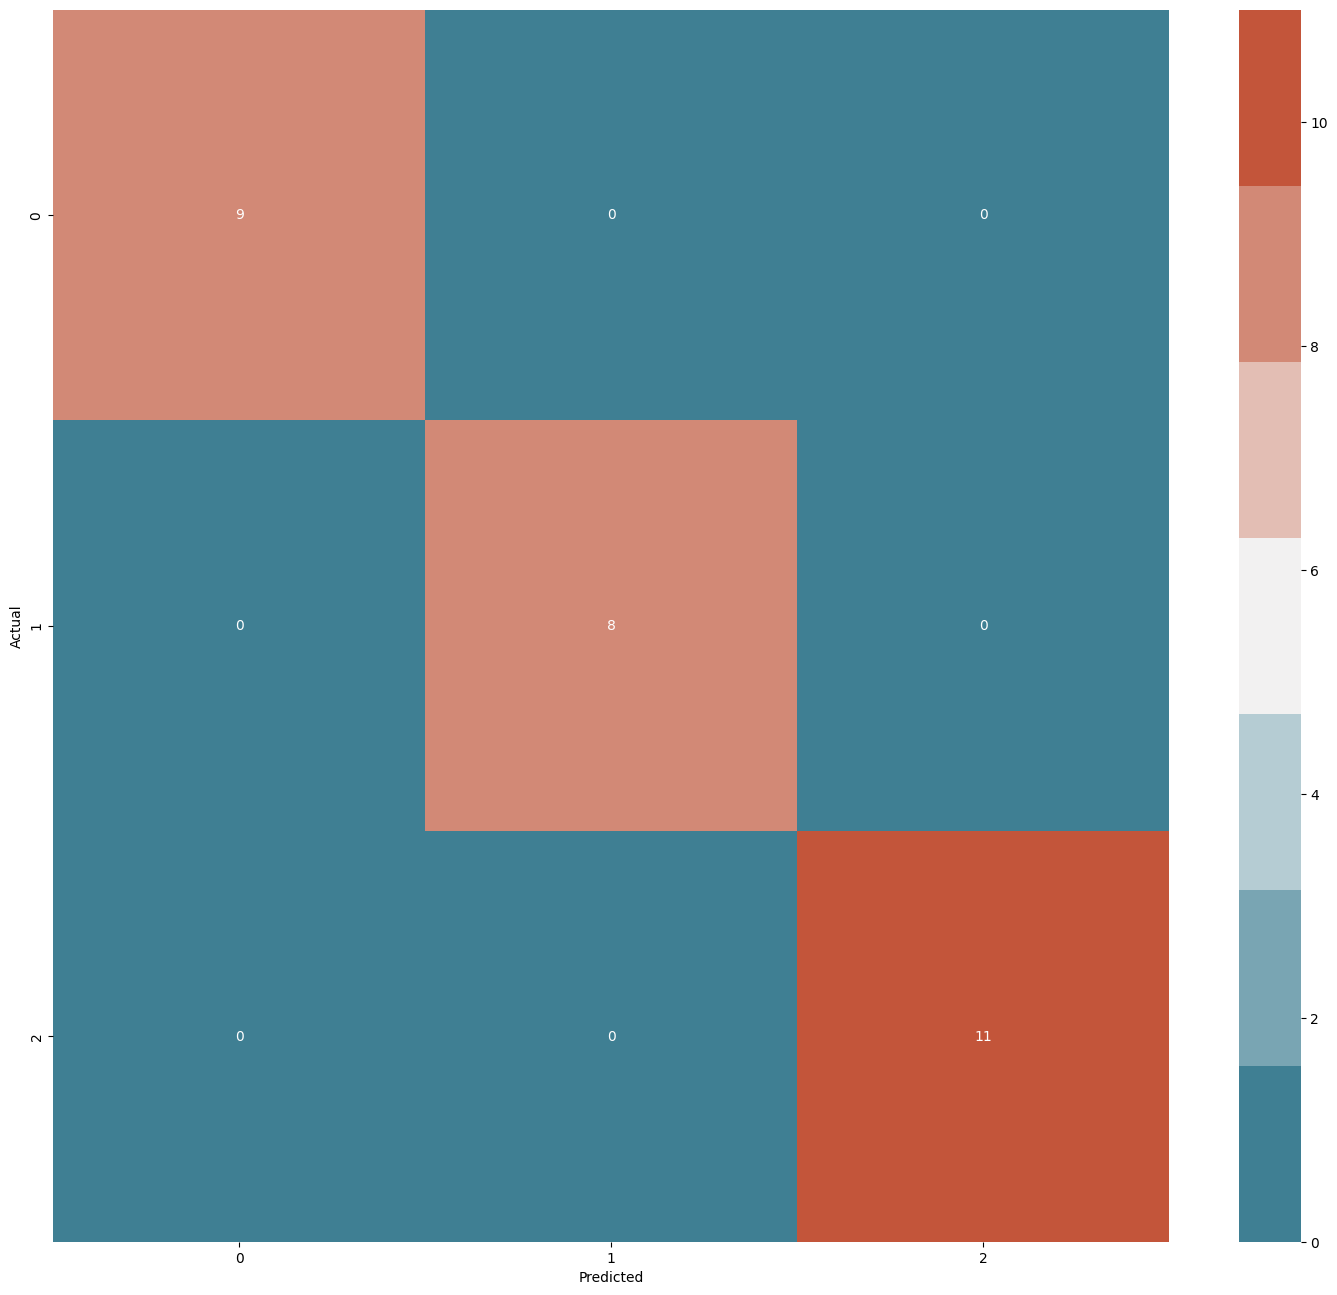

In [21]:
getMetrics(predictions, outputs_test, threshold=0.998)

plot_cm(
    lb.inverse_transform(outputs_test, threshold= 0.998),
    lb.inverse_transform(predictions,threshold= 0.998),
    [lb.classes_[0]]
)